## Youtube API projects test
This is a self project wanted to learn how to pull API from youtube with Python. Today, we're going to pull the data from "The first take" channel to observe something from this channel.

## The first take

If you listen to Japanese musics, I think you might have heard a youtube channel name "The first take". This channel invites Japanese singer to sing their songs, but a little improvise from their original.






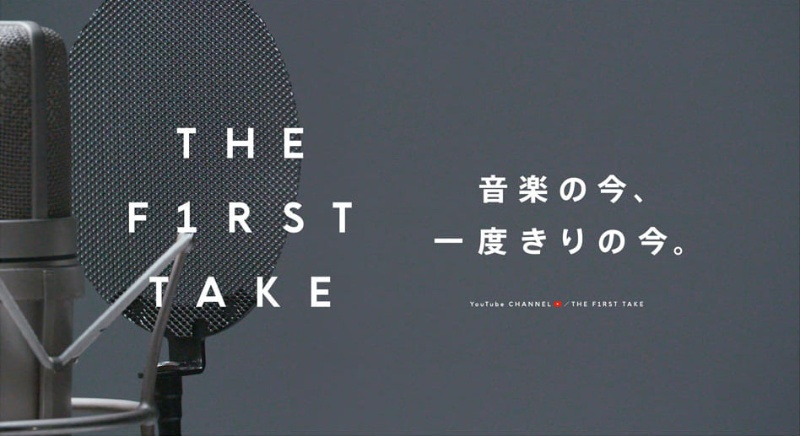








In [2]:
#import library
import requests
import pandas as pd
import time

In [3]:
#Define API key & Channel ID
API_KEY = ""
CHANNEL_ID = ""

In [4]:
#make API call
pageToken = ""
url = "https://www.googleapis.com/youtube/v3/search?key="+API_KEY+"&channelId="+CHANNEL_ID+"&part=snippet,id&order=date&maxResults=1000"+pageToken

response = requests.get(url).json()
#response['items'][0]

In [6]:
def get_video_details(video_id):
    #collecting view, like, comment counts
        url_video_stats = "https://www.googleapis.com/youtube/v3/videos?id="+video_id+"&part=statistics&key="+API_KEY
        response_video_stats = requests.get(url_video_stats).json()
        
        #output
        view_count = response_video_stats['items'][0]['statistics']['viewCount']
        like_count = response_video_stats['items'][0]['statistics']['likeCount']
        comment_count = response_video_stats['items'][0]['statistics']['commentCount']
        
        return view_count, like_count, comment_count

In [7]:
def get_videos(df):
    #make API call
    pageToken = ""
    #Pulling data order by view_count
    url = "https://www.googleapis.com/youtube/v3/search?key="+API_KEY+"&channelId="+CHANNEL_ID+"&part=snippet,id&order=view_count&maxResults=1000"+pageToken

    response = requests.get(url).json()
    time.sleep(1)
    
    for video in response["items"]:
        if video['id']['kind'] == "youtube#video":
            video_id = video['id']['videoId']
            video_title = video['snippet']['title']
            upload_date = video['snippet']['publishedAt']
            upload_date = str(upload_date).split("T")[0]
            
            view_count, like_count, comment_count = get_video_details(video_id)
            
            #save data in dataframe
            df = df.append({'video_id': video_id,
                        'video_title': video_title,
                        'upload_date': upload_date,
                        'view_count': view_count,
                        'like_count': like_count,
                        'comment_count': comment_count}, ignore_index =True)
    return df

In [8]:
#build our dataframe
df = pd.DataFrame(columns=['video_id', 'video_title', 'upload_date', 'view_count', 'like_count', 'comment_count'])

df = get_videos(df)

In [9]:
#print dataframe
df

,video_id,video_title,upload_date,view_count,like_count,comment_count
0,gsT6eKsnT0M,DISH// (北村匠海) - 猫 / THE FIRST TAKE,2020-03-20,176130647,1124066,46569
1,j1hft9Wjq9U,YOASOBI - 夜に駆ける / THE HOME TAKE,2020-05-15,123877032,1620665,64341
2,MpYy6wwqxoo,LiSA - 紅蓮華 / THE FIRST TAKE,2019-12-06,121443269,1310564,45369
3,yXZd7xVdpJ0,優里 - ドライフラワー / THE FIRST TAKE,2020-10-30,95937069,559874,19073
4,NyUTYwZe_l4,YOASOBI - 群青 / THE FIRST TAKE,2021-02-26,65881086,961435,33984
5,4Q9DWZLaY2U,LiSA - 炎 / THE FIRST TAKE,2020-10-16,56462126,775620,28186
6,impSuIygMiQ,LiSA×Uru - 再会 (produced by Ayase) / THE FIRST ...,2020-11-06,54547200,514356,16893
7,9ZG9G3v1RPk,Def Tech - My Way / THE FIRST TAKE,2020-11-20,31702314,450284,17239
8,_ZyD4n5zqxA,KANA-BOON（谷口鮪）× ネクライトーキー（もっさ） - ないものねだり / TH...,2020-03-13,30208492,636920,19741
9,-n790YakYKc,優里 - ベテルギウス / THE FIRST TAKE,2021-10-13,30032712,264832,7074


In [10]:
# Exploratory data analysis
df.shape

(49, 6)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       49 non-null     object
 1   video_title    49 non-null     object
 2   upload_date    49 non-null     object
 3   view_count     49 non-null     object
 4   like_count     49 non-null     object
 5   comment_count  49 non-null     object
dtypes: object(6)
memory usage: 2.4+ KB


In [12]:
df = df.astype(dict.fromkeys(df.columns[3:], int))
df["upload_date"] = pd.to_datetime(df["upload_date"], format='%Y-%m-%d')

In [13]:
#recheck data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   video_id       49 non-null     object        
 1   video_title    49 non-null     object        
 2   upload_date    49 non-null     datetime64[ns]
 3   view_count     49 non-null     int64         
 4   like_count     49 non-null     int64         
 5   comment_count  49 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 2.4+ KB


In [14]:
df.describe()

,view_count,like_count,comment_count
count,4.900000e+01,4.900000e+01,49.000000
mean,2.771340e+07,3.695244e+05,13876.673469
std,3.406337e+07,3.180070e+05,12401.790553
min,7.126498e+06,9.170200e+04,2765.000000
25%,1.057554e+07,1.829240e+05,5361.000000
50%,1.520752e+07,2.555770e+05,9977.000000
75%,2.444225e+07,4.354530e+05,19073.000000
max,1.761306e+08,1.620665e+06,64341.000000


In [15]:
#import graphical package
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Observe the top ten videos that have the highest view count
top_10_views = df.sort_values('view_count', ascending = False)[:10]
top_10_views

,video_id,video_title,upload_date,view_count,like_count,comment_count
0,gsT6eKsnT0M,DISH// (北村匠海) - 猫 / THE FIRST TAKE,2020-03-20,176130647,1124066,46569
1,j1hft9Wjq9U,YOASOBI - 夜に駆ける / THE HOME TAKE,2020-05-15,123877032,1620665,64341
2,MpYy6wwqxoo,LiSA - 紅蓮華 / THE FIRST TAKE,2019-12-06,121443269,1310564,45369
3,yXZd7xVdpJ0,優里 - ドライフラワー / THE FIRST TAKE,2020-10-30,95937069,559874,19073
4,NyUTYwZe_l4,YOASOBI - 群青 / THE FIRST TAKE,2021-02-26,65881086,961435,33984
5,4Q9DWZLaY2U,LiSA - 炎 / THE FIRST TAKE,2020-10-16,56462126,775620,28186
6,impSuIygMiQ,LiSA×Uru - 再会 (produced by Ayase) / THE FIRST ...,2020-11-06,54547200,514356,16893
7,9ZG9G3v1RPk,Def Tech - My Way / THE FIRST TAKE,2020-11-20,31702314,450284,17239
8,_ZyD4n5zqxA,KANA-BOON（谷口鮪）× ネクライトーキー（もっさ） - ないものねだり / TH...,2020-03-13,30208492,636920,19741
9,-n790YakYKc,優里 - ベテルギウス / THE FIRST TAKE,2021-10-13,30032712,264832,7074


In [26]:
# How many views difference between the 1st place and the 2nd place
view_diff_1_2 = df['view_count'][0] - df['view_count'][1]
view_diff_1_2

52253615

From the observation, it was found that the highest view video is "DISH// (Takumi Kitamura) - Neko(Cat)/THE FIRST TAKE" (I really recommended you to open this song with subtitle). 

The number of view of this video is jumped apart from the 2nd place by 52M views!!!


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21271 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21280 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28023 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29483 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22812 missing from current font.
  font.set_

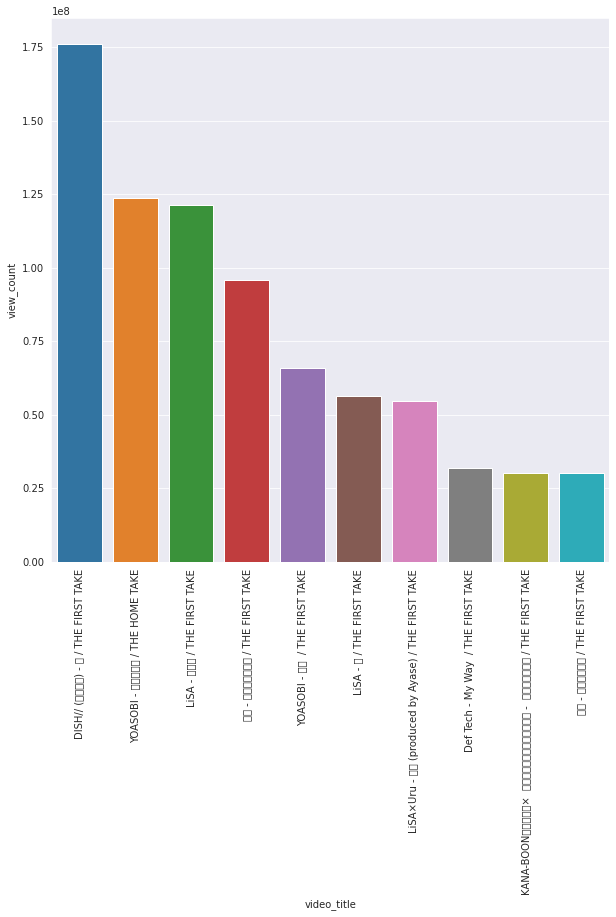

In [24]:
# Plot graph (I tried to find the way to make Python to read Japanese, but it failed. I still keep finding the ways if you have any method to do this, please let me know)
sns.set_style("darkgrid",{"font.sans-serif":['Noto Sans CJK JP', 'Arial']})
plt.figure(figsize = (10,10))
plt.rc("font", family = "Noto Sans CJK JP") 
ax = sns.barplot(x='video_title', y = 'view_count', data = top_10_views)
plt.xticks(rotation = 90)
plt.show()

However view count didn't mean that every people like this song.
Let's observe the like count

In [27]:
top_10_likes = df.sort_values('like_count', ascending = False)[:10]
top_10_likes

,video_id,video_title,upload_date,view_count,like_count,comment_count
1,j1hft9Wjq9U,YOASOBI - 夜に駆ける / THE HOME TAKE,2020-05-15,123877032,1620665,64341
2,MpYy6wwqxoo,LiSA - 紅蓮華 / THE FIRST TAKE,2019-12-06,121443269,1310564,45369
0,gsT6eKsnT0M,DISH// (北村匠海) - 猫 / THE FIRST TAKE,2020-03-20,176130647,1124066,46569
4,NyUTYwZe_l4,YOASOBI - 群青 / THE FIRST TAKE,2021-02-26,65881086,961435,33984
5,4Q9DWZLaY2U,LiSA - 炎 / THE FIRST TAKE,2020-10-16,56462126,775620,28186
8,_ZyD4n5zqxA,KANA-BOON（谷口鮪）× ネクライトーキー（もっさ） - ないものねだり / TH...,2020-03-13,30208492,636920,19741
18,GsLsBs4oW30,TK from 凛として時雨 - unravel / THE FIRST TAKE,2020-04-10,20323967,623441,21668
3,yXZd7xVdpJ0,優里 - ドライフラワー / THE FIRST TAKE,2020-10-30,95937069,559874,19073
13,qIBWRPqJcGQ,鈴木雅之 - DADDY ! DADDY ! DO ! feat. 鈴木愛理 / THE F...,2020-08-21,24209312,554372,21492
6,impSuIygMiQ,LiSA×Uru - 再会 (produced by Ayase) / THE FIRST ...,2020-11-06,54547200,514356,16893


From the observation, it was found that the first and the second place was changed. 

The first place is changed to "YOASOBI - Racing Into The Night (Yoru ni Kakeru) / THE HOME TAKE" which have 1.6 Million like count!!!.

The second place is "LiSA - Gurenge (紅蓮華) / THE FIRST TAKE" which is an original sound track for Demon slayer animation. 